<a href="https://colab.research.google.com/github/mcmaharrey/MLA_MCM/blob/main/MLA3_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matthew Maharrey <br>
CS430-ON <br>
Assignment 3

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

**Connecting to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()


    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/CS430/banknote_authentication.csv")

**Statistics and Visual Exploration**

In [ ]:
numerical_summary = df.describe()
print(numerical_summary)

          variance     skewness     curtosis      entropy      forgery
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


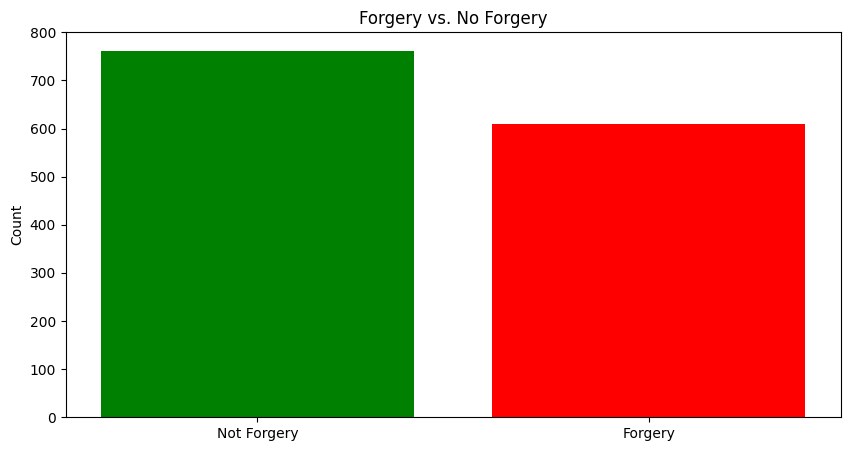

In [ ]:
forgery_counts = df['forgery'].value_counts()
forgery_counts_df = pd.DataFrame({'Forgery': forgery_counts.index, 'Count': forgery_counts.values})
plt.figure(figsize=(10, 5))
plt.bar(forgery_counts_df['Forgery'], forgery_counts_df['Count'], color=['green', 'red'])
plt.ylabel('Count')
plt.title('Forgery vs. No Forgery')
plt.xticks([0, 1], ['Not Forgery', 'Forgery'])
plt.show()

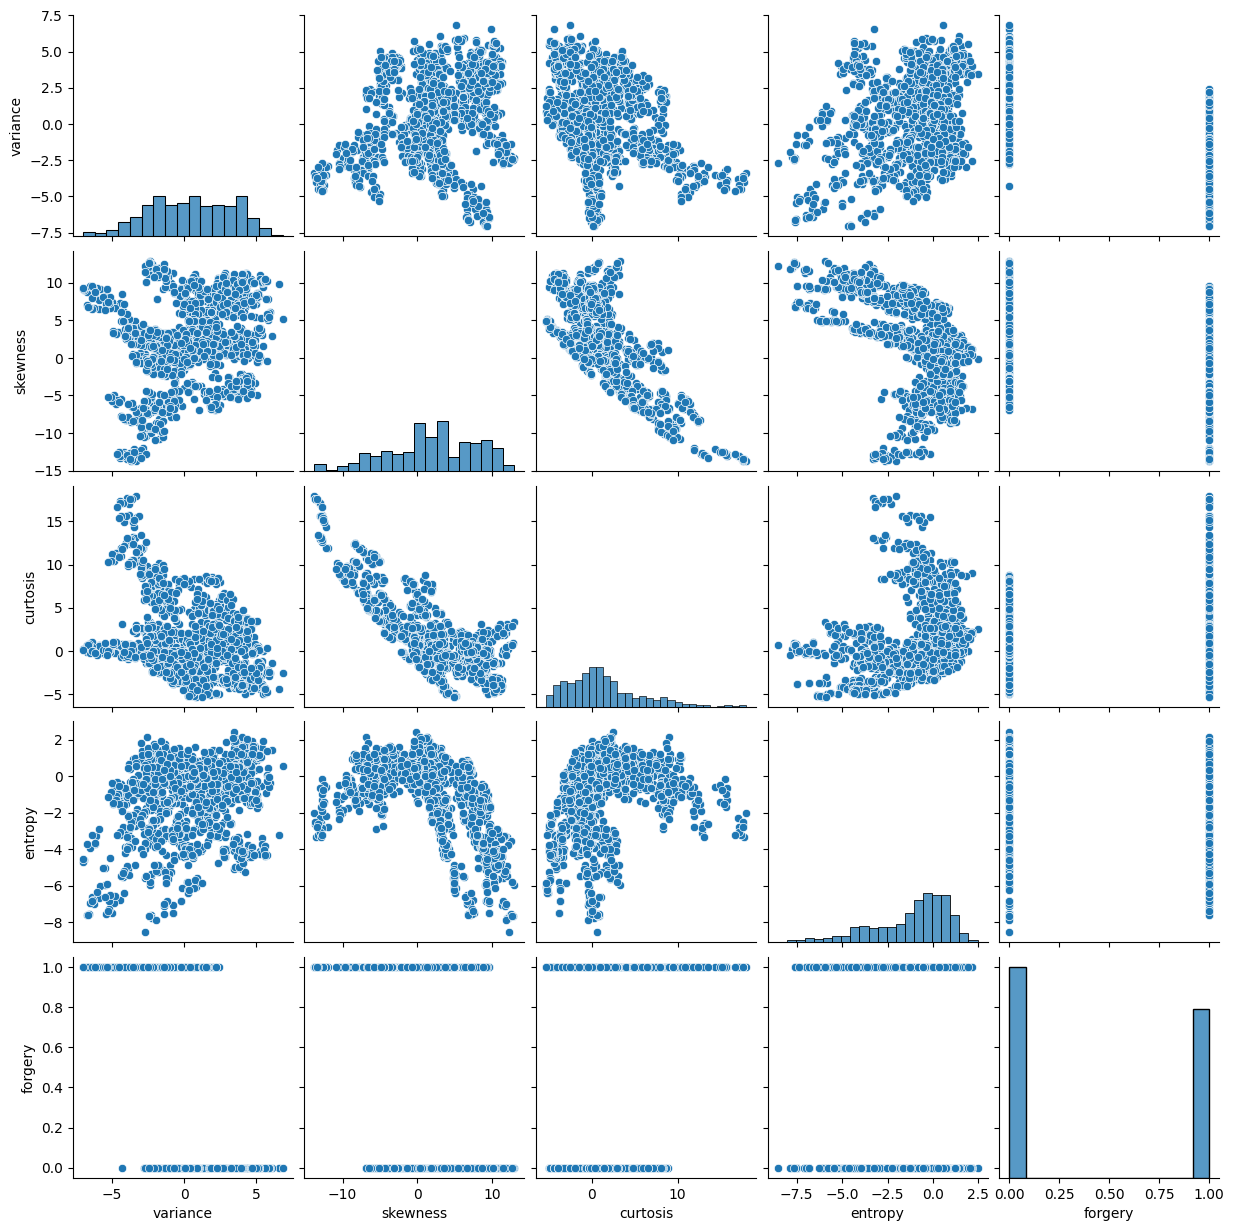

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical_columns)
plt.show()

**Splitting Data into Train/Test**

In [ ]:
X = df.drop(columns=['forgery'])

In [ ]:
y = df[['forgery']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1097, 4)
X_test shape: (275, 4)
y_train shape: (1097, 1)
y_test shape: (275, 1)


**Building the Pipeline**

In [ ]:
numerical_indices = X.select_dtypes(include=['float64', 'int64']).columns

column_transformer = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_indices)
    ],
    remainder='passthrough'
)

svm_pipeline = Pipeline([
    ('preprocessor', column_transformer),  # MinMax scaling
    ('classifier', SVC(kernel='linear'))   # SVM classification with linear kernel
])


**Executing the Model**

In [ ]:
svm_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', SVC(kernel='linear'))])

**Evaluating the Model**

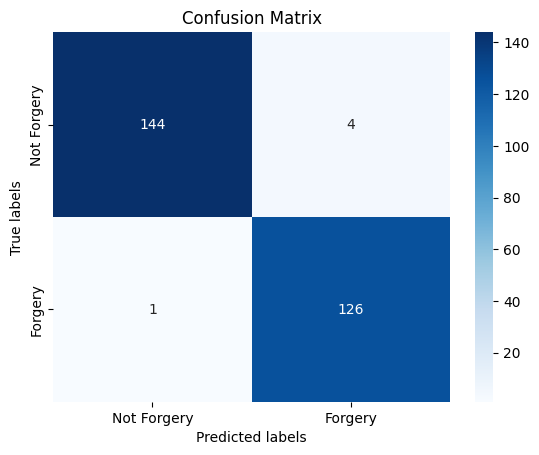

Precision: 0.9692307692307692
Recall: 0.9921259842519685
F1 Score: 0.980544747081712


In [ ]:
y_pred = svm_pipeline.predict(X_test)

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Not Forgery', 'Forgery'])
    ax.yaxis.set_ticklabels(['Not Forgery', 'Forgery'])
    plt.show()

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

The precision score of .96 shows that out of all the banknotes predicted as a forgery 96% were forgerys. <br>
The recall of .99 means that the model correctly identified 99% of all the forgeries in the dataset.<br>
The f1 score of .98 shows a good balance between precision and recall.


The model showed a high reliability in predicting whether or not a bank note was a forgery or not. With high precision, recall, and F1 score, it demonstrates strong performance in distinguishing between real banknotes and forgeries.

**Steel Industry SVM Regression**

**Acquire Data**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
df.columns = ['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']

**Splitting Data into Train/Test**

In [ ]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df[['usage_kwh']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28032, 9)
X_test shape: (7008, 9)
y_train shape: (28032, 1)
y_test shape: (7008, 1)


**Building the Pipeline**

In [ ]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply transformations
    ('regressor', SVR())             # SVR regression
])


**Executing the Model**

In [ ]:
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regressor', SVR())])

**Evaluating the Model**

In [ ]:
y_pred = pipeline.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

y_train_pred = pipeline.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Root Mean Squared Error (Train):", rmse_train)
print("Root Mean Squared Error (Test):", rmse_test)

Root Mean Squared Error (Train): 4.726711080279755
Root Mean Squared Error (Test): 4.323625833374287


The train RMSE returned a value of 4.73 which shows that the model's prediction only differed by 4.73 kilowatt hours. <br>
The test RMSE value was 4.32 which showed that the model's prediction only differed by 4.32 kilowatt hours.

The model showed that using SVM Regression the model is suitable for predicting kilowatt hour usage.